## Introdução

O objetivo desse trabalho é tentar explorar e entender as relações entre os diversos fatores associados ao uso de álcool entre estudantes de Ensino Médio em Portugal. A análise é centrada na correlação de fatores como tempo de estudo e relações familiares com o consumo de álcool, porém também são abordadas as interrelações entre os demais fatores.

A análise foi realizada na linguagem Python, utilizando-se a bilioteca Pandas para a limpeza e manipulação de dados, e as bibliotecas Matplotlib e Seaborn para sua visualização.

Abaixo, realizamos as importações necessárias ao desenvolvimento da análise exploratória, e exibimos os arquivos disponíveis no dataset:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

for dirname, _, filenames in os.walk('../input/student-alcohol-consumption'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/student-alcohol-consumption/student-mat.csv
../input/student-alcohol-consumption/student-merge.R
../input/student-alcohol-consumption/student-por.csv


### Escolha do dataset

São disponibilizados dois datasets, um referente ao desempenho de um grupo de estudantes em Português e outro com o desempenho de um outro grupo em Matemática, com uma substancial interseção entre ambos. Importamos ambos para realizar uma análise inicial.

In [2]:
df_mat = pd.read_csv('../input/student-alcohol-consumption/student-mat.csv')
df_por = pd.read_csv('../input/student-alcohol-consumption/student-por.csv')

O método describe permitiu obter uma compreensão númerica geral dos dados. Observou-se que os dados do dataset relativo à matemática são bastante semelhantes ao de português, sendo que esse possui um número um pouco maior de observações.

In [3]:
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Realizou-se então a matriz de correlação entre as variáveis, plotando o resultado como um heatmap. Alteramos os valores-padrão para que os extremos correspondessem a -1 e 1 e escolhemos o colormap "seismic" por seu contraste maior.

<AxesSubplot:>

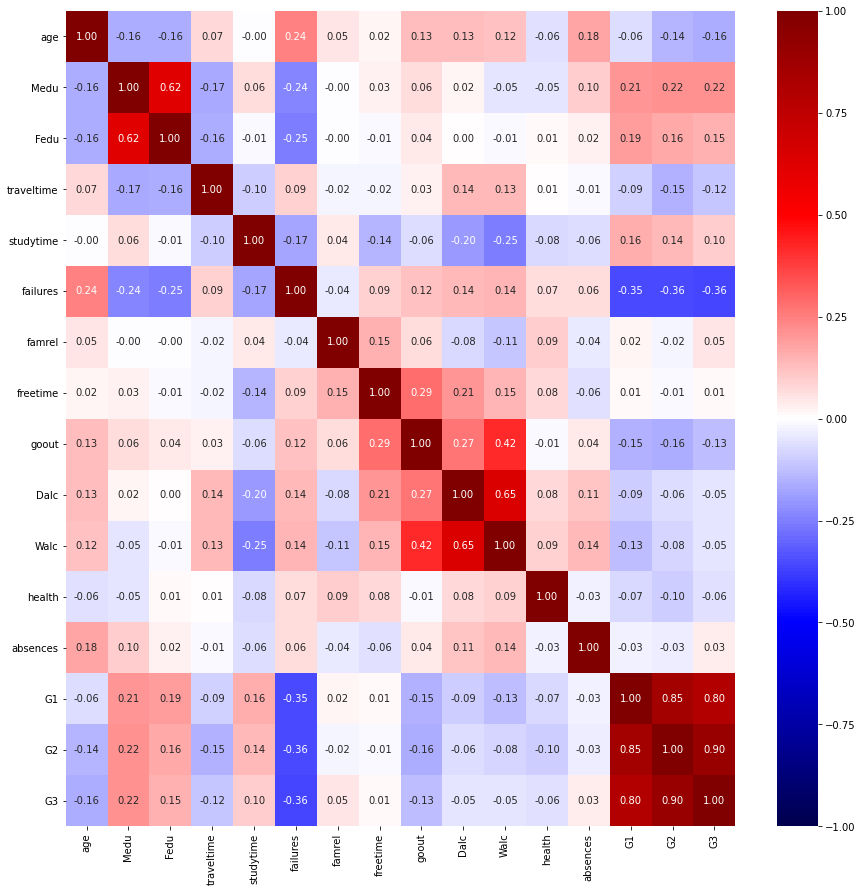

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(df_mat.corr(),annot = True,fmt = ".2f",cbar = True, cmap='seismic', vmin=-1, vmax=1)

<AxesSubplot:>

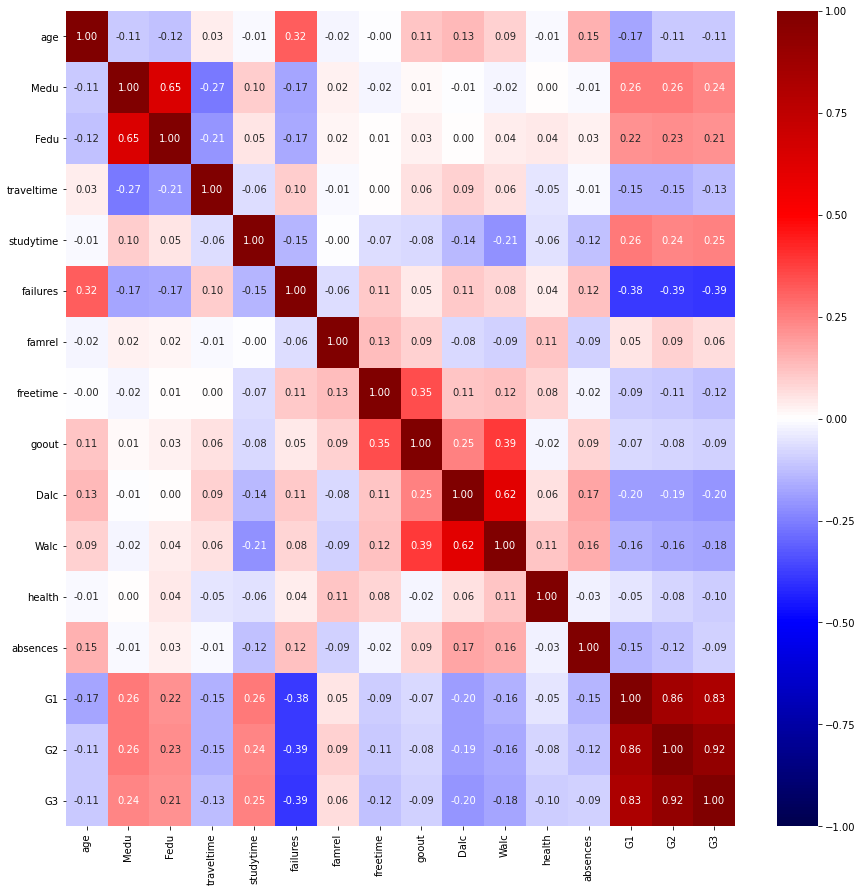

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df_por.corr(),annot = True,fmt = ".2f",cbar = True, cmap='seismic', vmin=-1, vmax=1)

A matriz de correlação nos fez perceber que as correções entre as variáveis apresenta também valores bastante semelhantes entre os datasets. Sendo assim, escolhemos trabalhar com as notas de matemática em homenagem à nossa querida Escola de Matemática Aplicada da Fundação Getúlio Vargas.

Observamos que os maiores valores de associação foram entre as próprias notas e e do consumo de álcool durante a semana com o consumo de álcool no final de semana. Também parece estatisticamente significativa a associação entre o grau de educação paterno e o materno. Embora um pouco mais fracas, as associações entre consumo de álcool e frequência de saídas com amigos e entre consumo de álcool e tempo de estudo também parecem ser merecedoras de maior investigação.


## Relações com consumo de álcool

Utilizando como base o heatmap acima, iremos explorar em detalhes algumas variáveis consideradas relevantes por:
* terem apresentado os maiores valores de associação positiva ou negativa
* haverem motivos relevates para haver uma associação, mesmo que não tenha sido confirmada pelos valores do coeficiente de Pearson

Como referência para as próximas análises, tenhamos em mente que tanto o consumo de álcool durante a semana (Dalc) quanto o consumo no final de semana (Walc) são avaliados em uma escala de 1 a 5, no qual 1 é o menor consumo e 5 o maior.


### Idade

Vamos visualizar a distribuição das idades. No ensino secundário, era mesmo esperado que a maioria dos alunos tivesse entre 15 e 18 anos.

mean      16.696203
median    17.000000
Name: age, dtype: float64


<AxesSubplot:>

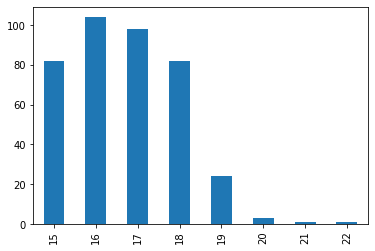

In [7]:
print(df_mat['age'].agg(['mean', 'median']))
df_mat['age'].value_counts().sort_index().plot(kind='bar')

Analisamos, então, a média e a mediana do consumo de álcool por faixa etária. Observamos que:
* O consumo de álcool, em qualquer dia da semana, foi maior entre estudantes de 17 e 18 anos do que entre estudantes de 15 e 16.
* O consumo de alcool por jovens de 20 a 22 dois anos parece ser maior que o de adolescente, porém, o tamanho da amostra é insuficiente para extrair alguma informação estatisticamente relevante.

In [8]:
df_mat.groupby('age')[['Dalc', 'Walc']].agg(['mean', 'median', 'count'])

Dalc                   Walc             
         mean median count      mean median count
age                                              
15   1.353659      1    82  1.902439      1    82
16   1.432692      1   104  2.278846      2   104
17   1.520408      1    98  2.571429      3    98
18   1.548780      1    82  2.414634      2    82
19   1.458333      1    24  1.958333      2    24
20   2.000000      1     3  2.333333      1     3
21   3.000000      3     1  3.000000      3     1
22   5.000000      5     1  5.000000      5     1

Abaixo, removemos os jovens de 20, 21 e 22 anos da amostra e fizemos dois *violin plots* que permitem melhor visualização da distribuição do consumo de álcool por faixa etária:

Text(0.5, 1.0, 'No final de semana')

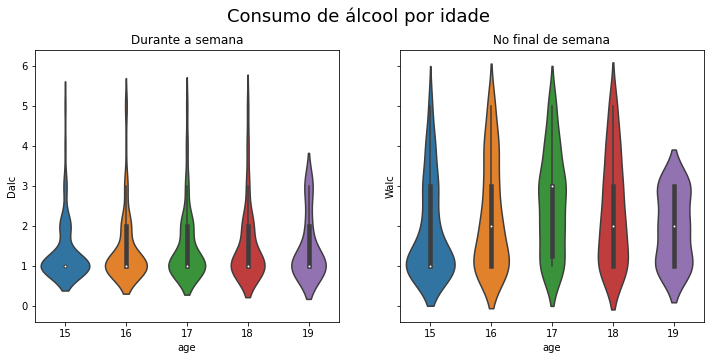

In [9]:
# Filtrando para apenas estudantes de até dezenove anos
df_jovens = df_mat[df_mat['age'] <= 19]

# Plotando os gráficos
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,5))
fig.suptitle('Consumo de álcool por idade', size=18, y=1)

sns.violinplot(ax=axes[0], x='age', y='Dalc', data=df_jovens)
axes[0].set_title('Durante a semana')

sns.violinplot(ax=axes[1], x='age', y='Walc', data=df_jovens)
axes[1].set_title('No final de semana')


### Somando álcool durante e no fim de semana

Para análises envovendo algumas categorias binárias, como sexo, não iremos analisar a diferença entre o consumo de álcool durante a semana e nos finais de semana. Para tanto, será criada a variável 'Talc' (Total álcool), correspondente à soma das outras duas variáveis. O uso de .describe() nos demonstra que os valores parecem ser coerentes.

In [10]:
df_mat['Talc'] = df_mat['Dalc'] + df_mat['Walc']
df_mat['Talc'].describe()

count    395.000000
mean       3.772152
std        1.984389
min        2.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: Talc, dtype: float64

### Tempo de Estudo

O tempo de estudo parece estar negativamente correlacionado com o consumo de álcool: estuantes que estudam mais, bebem menos, especialmente aos finais de semana. Vamos também tentar ver se isso afeta mais ou menos estudantes em um relacionamento.

Vamos primeiro analisar a distribuição do tempo de estudo entre os estudantes, em número de horas semanais, e a proporção de estudantes em um relacionamento.

mean      2.035443
median    2.000000
Name: studytime, dtype: float64


Text(0.5, 1.0, 'Distribuição da quantidade de horas estudadas por semana')

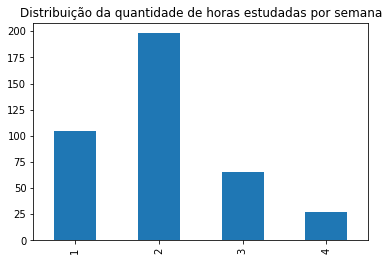

In [11]:
print(df_mat['studytime'].agg(['mean', 'median']))
g = df_mat['studytime'].value_counts().sort_index().plot(kind = 'bar')
g.set_title('Distribuição da quantidade de horas estudadas por semana')

Text(0.5, 1.0, 'Proporção de estudantes em um relacionamento')

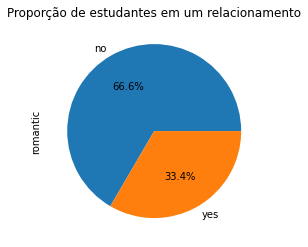

In [12]:
g = df_mat['romantic'].value_counts().plot(kind='pie', autopct='%1.1f%%')
g.set_title('Proporção de estudantes em um relacionamento')

Há estudantes suficientes em ambos os grupos para fazer uma comparação. Como varia o consumo de álcool em relação ao tempo de estudo para estudantes em um relacionamento e solteiros?

Curiosamente, observamos que em solteiros um maior consumo de álcool está correlacionado a menos tempo de estudo. Não obstante, entre os que namoram, essa correlação foi bem mais fraca, indicando que possivelmente, ou seja, talvez eles consigam conciliar melhor horas de estudo e a birita.


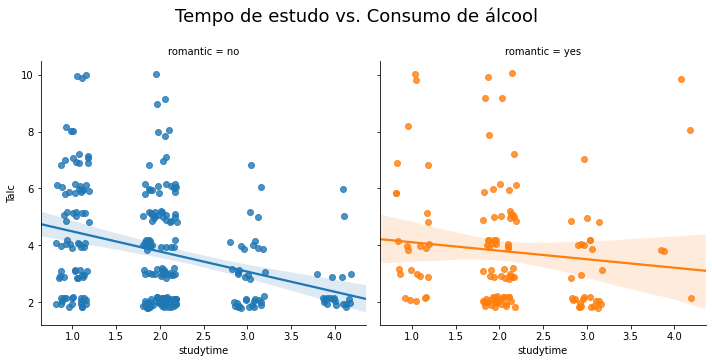

In [13]:
g = sns.lmplot(x="studytime", y="Talc", col="romantic", hue="romantic",
           x_jitter=0.2, y_jitter=0.2, data=df_mat, truncate=False)
g.fig.suptitle('Tempo de estudo vs. Consumo de álcool', y=1, size=18)
plt.tight_layout()


## Tempo de estudo e acesso à internet

A fim de estudar essa relação, fizemos um gráfico de pizza para entender o dado. Por conta disso, vimos que 16,7% dos estudantes não possuem acesso à internet.

Text(0.5, 1.0, 'Proporção de estudantes com acesso à internet')

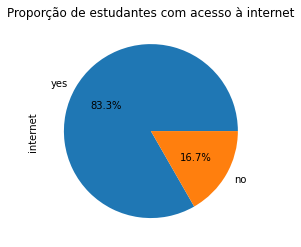

In [14]:
g = df_mat['internet'].value_counts().plot(kind='pie', autopct='%1.1f%%')
g.set_title('Proporção de estudantes com acesso à internet')

A partir disso, podemos perceber que entre os alunos que os alunos sem acesso à internet em casa se concentram em 3h de estudos semanais ou menos, o que não ocorre com os alunos que possuem internet em casa, que chegam a estudar até 4h por semana.

(-1.0, 5.0)

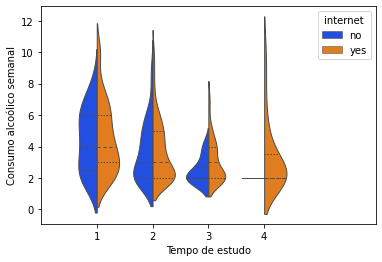

In [15]:
sns.violinplot(data=df_mat, x="studytime", y="Talc", hue="internet",
               split=True, inner="quart", linewidth=1, palette='bright')

plt.xlabel('Tempo de estudo')
plt.ylabel('Consumo alcoólico semanal')
plt.xlim(-1,5) 

### Reprovações

Vamos agora analisar as reprovações e sua associação com o consumo de álcool. Podemos perceber que a vasta maioria dos estudantes não acumula reprovações, alguns reprovaram uma vez e poucos mais de uma.

<AxesSubplot:>

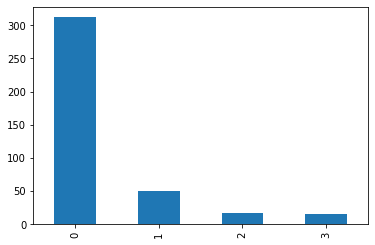

In [16]:
df_mat['failures'].value_counts().sort_index().plot(kind='bar')

Separamos os estudantes entre os que possuíam apoio familiar ou não. Dentre os que não recebiam apoio familiar, a correlação entre mais reprovações e consumo de álcool foi maior dos que não possuíam. 

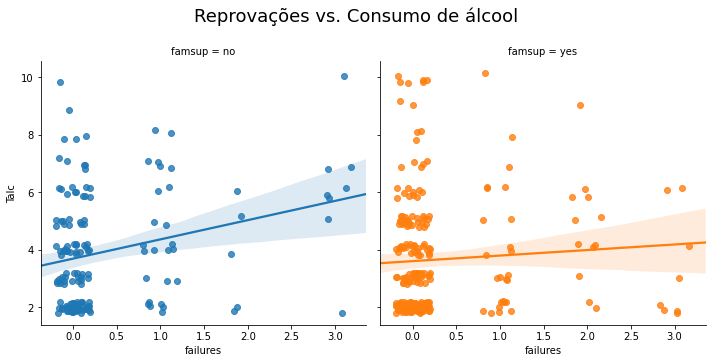

In [17]:
g = sns.lmplot(x="failures", y="Talc", col="famsup", hue="famsup",
           x_jitter=0.2, y_jitter=0.2, data=df_mat, truncate=False)
g.fig.suptitle('Reprovações vs. Consumo de álcool', y=1, size=18)
plt.tight_layout()

### Emprego dos Pais



Será que o consumo de álcool está correlacionado com a profissão paterna. Ainda que essa variável não seja numérica e tenha sido abordada na matriz, iremos explorá-la:

Text(0.5, 1.0, 'Profissão paterna')

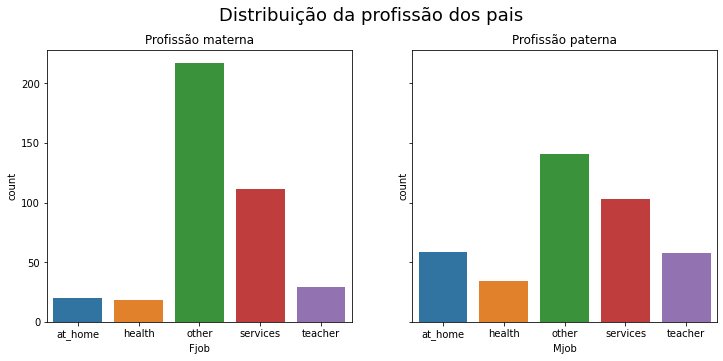

In [18]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,5))
fig.suptitle('Distribuição da profissão dos pais', size=18, y=1)

order = df_mat['Fjob'].value_counts().sort_index().index
sns.countplot(ax=axes[0], data=df_mat, x='Fjob', order=order)
axes[0].set_title('Profissão materna')
sns.countplot(ax=axes[1], data=df_mat, x='Mjob', order=order)
axes[1].set_title('Profissão paterna')


Observamos que a maioria dos pais possui empregos que não em casa, na área da saúde ou da educação. Dominam as categorias "outros" e "serviços". Mas como será o consumo de álcool dos jovens em cada uma dessas profissões?

In [19]:
df_mat.groupby('Fjob')['Talc'].agg(['mean', 'median', 'count'])

,mean,median,count
Fjob,,,
at_home,3.000000,2,20
health,3.222222,2,18
other,3.769585,3,217
services,4.117117,4,111
teacher,3.344828,3,29


In [20]:
df_mat.groupby('Mjob')['Talc'].agg(['mean', 'median', 'count'])

,mean,median,count
Mjob,,,
at_home,3.728814,3.0,59
health,3.647059,3.5,34
other,3.751773,3.0,141
services,3.805825,3.0,103
teacher,3.879310,3.0,58


Os dados parecem nos indicar que estudantes cujo pai trabalha em casa, na saúde ou na educação bebem menos do que estudantes cujo pai trabalha em serviços ou em outras áreas. A profissão da mãe não pareceu possuir muita diferença. Vamos esmiuçar a distribuição dos dados:

Text(0.5, 1.0, 'Profissão materna')

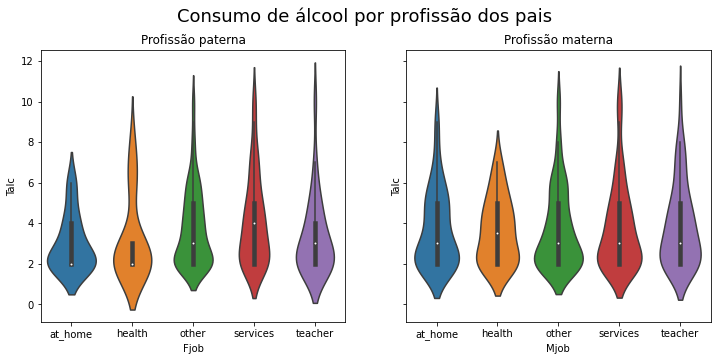

In [21]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,5))
fig.suptitle('Consumo de álcool por profissão dos pais', size=18, y=1)

sns.violinplot(ax=axes[0], x='Fjob', y='Talc', data=df_mat, order=order)
axes[0].set_title('Profissão paterna')

sns.violinplot(ax=axes[1], x='Mjob', y='Talc', data=df_mat, order=order)
axes[1].set_title('Profissão materna')

### Frequência de saídas com amigos

A correlação entre saídas com amigos e consumo de álcool (tanto Dalc quanto Walc) foi a correlação mais forte que encontramos. Porém, como será que se distribui essa frequência em relação ao consumo de álcool? Será que encontraremos variação por gênero?

In [22]:
df_mat.groupby('sex')[['Talc', 'goout']].agg(['mean', 'median', 'count'])

Talc                  goout             
         mean median count      mean median count
sex                                              
F    3.211538      3   208  3.028846      3   208
M    4.395722      4   187  3.197861      3   187

(-1.0, 5.0)

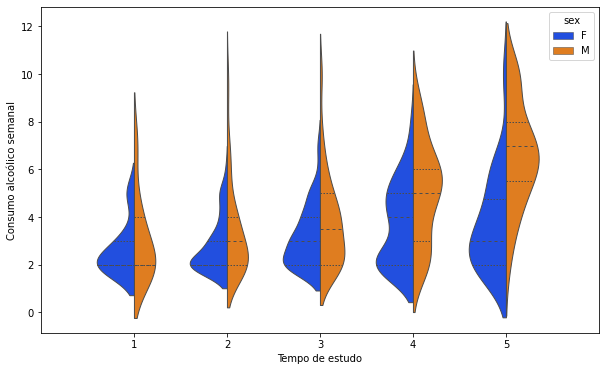

In [23]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df_mat, x="goout", y="Talc", hue="sex",
               split=True, inner="quart", linewidth=1, palette='bright')

plt.xlabel('Tempo de estudo')
plt.ylabel('Consumo alcoólico semanal')
plt.xlim(-1,5) 

### Consumo em dias letivos e nos fins de semana

Pelo gráfico abaixo, podemos observar claramente que as duas variáveis estão diretamente relacionadas, o que era esperado. Além disso, o consumo de bebidas alcoólicas nos fins de semana é sempre maior.

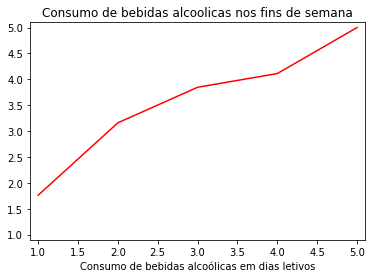

In [24]:
Walc_Dalc = df_mat.groupby('Dalc')[['Walc']].agg(['mean'])

plot = Walc_Dalc.plot(c='red',xlabel='Consumo de bebidas alcoólicas em dias letivos')
plot.set_title('Consumo de bebidas alcoolicas nos fins de semana')
plot.axis([0.9, 5.1, 0.9, 5.1])
plot.get_legend().remove()

### Reprovações

Pela análise do histograma, podemos perceber que há poucos alunos com reprovações.

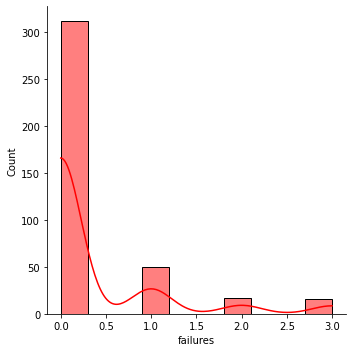

In [25]:
sns.displot(df_mat.failures,color='red', kde=True)

[Text(0.5, 0, 'Reprovações'), Text(0, 0.5, 'Bebidas nos fins de semana')]

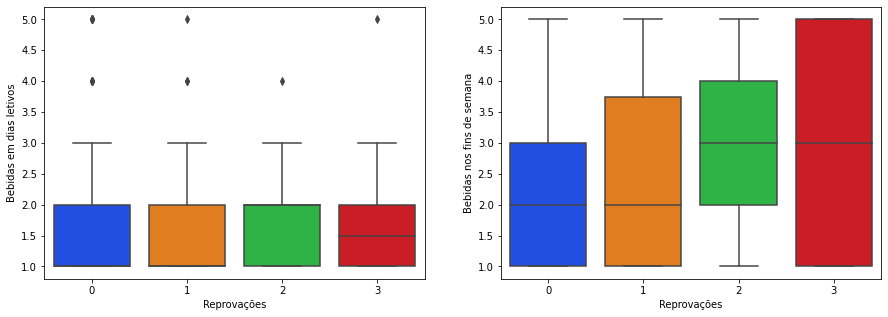

In [26]:
f = plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
boxplot1 =sns.boxplot(y="Dalc", x="failures", data = df_mat , orient="v", palette = 'bright',ax=ax)
boxplot1.set(xlabel='Reprovações',ylabel="Bebidas em dias letivos")

ax=f.add_subplot(122)
boxplot2 = sns.boxplot(y="Walc", x="failures", data = df_mat , orient="v", palette = 'bright',ax=ax)
boxplot2.set(xlabel='Reprovações',ylabel="Bebidas nos fins de semana")

Sendo assim, é notório que o consumo de bebidas alcoólicas não está diretamente relacionado com as reprovações, entretanto, os alunos que apresentam recorrência de reprovações, sim, consomem mais bebidas alcoólicas que os demais alunos.

### Distância entre a casa e a escola

Primeiramente, a variável que representa o tempo gasto de casa até a escola foi agrupada pelo consumo em dias letivos e fins de semana.

In [27]:
df_Dalc = df_mat.groupby('Dalc').mean()
df_Walc = df_mat.groupby('Walc').mean()

Posteriormente, foram plotadas a média dessas distâncias por cada nível de consumo. A partir disso, podemos perceber que o consumo de bebidas alcoólicas está diretamente relacionado com a distância de casa até a escola,

[Text(0.5, 0, 'Tempo gasto de casa até a escola'),
 Text(0, 0.5, 'Consumo de álcool no final de semana')]

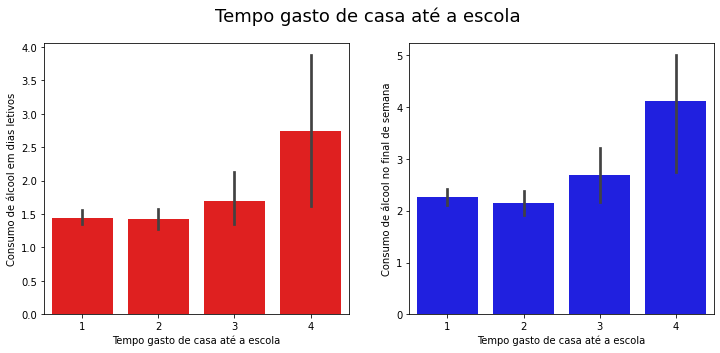

In [28]:
f = plt.figure(figsize=(12,5))
f.suptitle('Tempo gasto de casa até a escola', size=18)

ax=f.add_subplot(121)
sns.barplot(data=df_mat, x='traveltime', y='Dalc', color='red', ax=ax)
ax.set(xlabel='Tempo gasto de casa até a escola',
       ylabel='Consumo de álcool em dias letivos')

ax=f.add_subplot(122)
sns.barplot(data=df_mat, x='traveltime', y='Walc', color='blue', ax=ax)
ax.set(xlabel='Tempo gasto de casa até a escola',
       ylabel='Consumo de álcool no final de semana')

### Tempo livre

Primeiramente, agrupamos as variáveis pelo tempo livre.

In [29]:
df_freetime = df_mat.groupby('freetime').mean()

A partir da visualização desses dados, podemos perceber que o consumo de bebidas alcoólicas está diretamente relacionado com o tempo livre.

(0.9, 5.1, 1.0, 2.9)

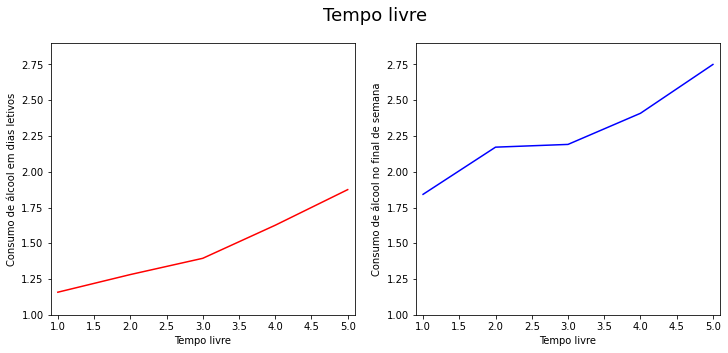

In [30]:
f = plt.figure(figsize=(12,5))
f.suptitle('Tempo livre', size=18)

ax=f.add_subplot(121)
sns.lineplot(data=df_freetime['Dalc'], color='red', ax=ax)
ax.set(xlabel='Tempo livre', ylabel='Consumo de álcool em dias letivos')
plt.axis([0.9, 5.1, 1, 2.9])

ax=f.add_subplot(122)
sns.lineplot(data=df_freetime['Walc'], color='blue', ax=ax)
ax.set(xlabel='Tempo livre', ylabel='Consumo de álcool no final de semana')
plt.axis([0.9, 5.1, 1, 2.9])

### Faltas

O dado original possuia alguns outliers que dificultavam a visualização, por isso foram selecionados apenas os alunos com 40 faltas ou menos.

In [31]:
df_few_abs = df_mat[df_mat['absences'] <= 40]

Podemos perceber que os alunos que bebem mais bebidas alcoólicas, principalmente em dias letivos, faltam mais.

[Text(0.5, 0, 'Faltas'), Text(0, 0.5, 'Bebidas nos fins de semana')]

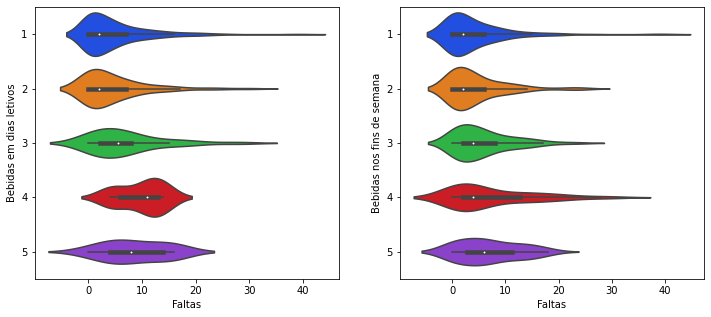

In [32]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
boxplot1 =sns.violinplot(y="Dalc", x="absences", data = df_few_abs , orient="h", palette = 'bright',ax=ax)
boxplot1.set(xlabel='Faltas',ylabel="Bebidas em dias letivos")

ax=f.add_subplot(122)
boxplot2 = sns.violinplot(y="Walc", x="absences", data = df_few_abs , orient="h", palette = 'bright',ax=ax)
boxplot2.set(xlabel='Faltas',ylabel="Bebidas nos fins de semana")

### Notas das provas

Primeiro, vamos analisar a distribuição de notas entre os alunos.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Avaliação Final')

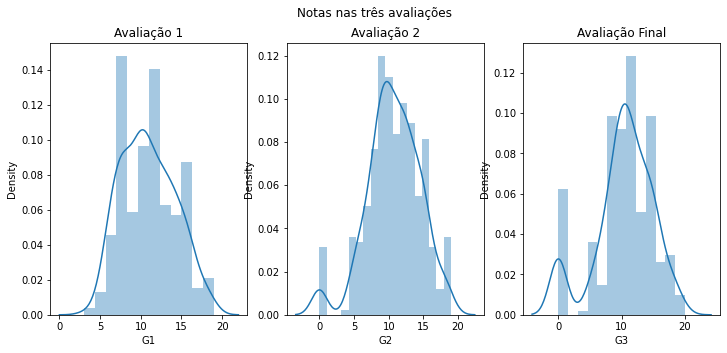

In [33]:
fig, ax = plt.subplots(1,3, figsize=(12,5))
fig.suptitle('Notas nas três avaliações')

sns.distplot(df_mat.G1, ax = ax[0])
ax[0].set_title("Avaliação 1")

sns.distplot(df_mat.G2, ax = ax[1])
ax[1].set_title("Avaliação 2")

sns.distplot(df_mat.G3, ax = ax[2])
ax[2].set_title("Avaliação Final")

A nota G3 é a nota final. Por isso, vamos dar o enfoque nela para a relação com o consumo de álcool.

<AxesSubplot:xlabel='G3', ylabel='Walc'>

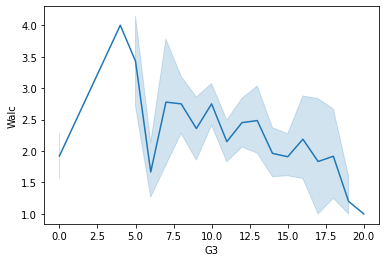

In [34]:
sns.lineplot(x='G3', y='Walc', data=df_mat)

## Outras relações interessantes

### Educação dos pais

Vamos realizar um comparativo entre a educação dos pai com a educação da mãe.

[Text(0, 0, 'None'),
 Text(0, 1, 'Primary Education'),
 Text(0, 2, '5th to 9th grade'),
 Text(0, 3, 'Secondary Education'),
 Text(0, 4, 'Higher Education')]

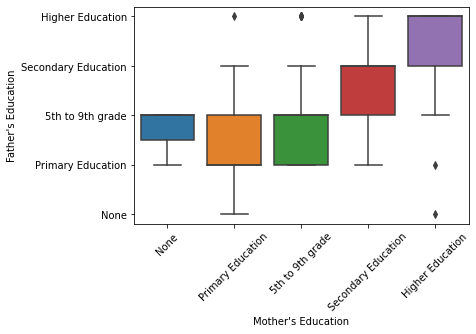

In [35]:
g = sns.boxplot(x='Medu', y='Fedu', data=df_mat)
g.set(xlabel = "Mother's Education",
     ylabel = "Father's Education")
g.set_xticklabels(labels = ['None', 'Primary Education', '5th to 9th grade', 'Secondary Education', 'Higher Education'],
                 rotation = 45)
g.set_yticks([0,1,2,3,4])
g.set_yticklabels(labels = ['None', 'Primary Education', '5th to 9th grade', 'Secondary Education', 'Higher Education'])

## Nota dos dois períodos (G1 e G2)

Nesse momento, vamos explorar a relação entre as notas dos dois períodos.

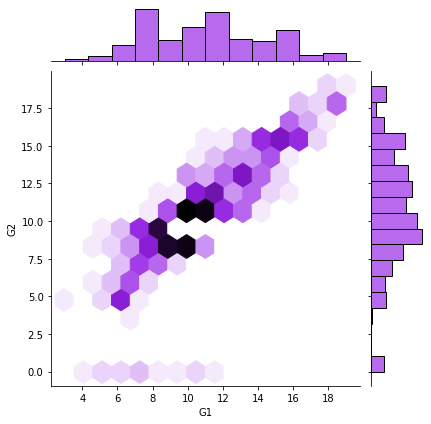

In [36]:
sns.jointplot(x='G1', y='G2', kind="hex", data=df_mat, color='#A038E7')

É possível observar que há uma tendência geral de pessoas tirarem notas muito parecidas nos dois períodos (evidenciado ainda mais pela reta x=y plotada no gráfico). Além disso, pode-se observar que um número razoável de pessoas tirou notas até 12.5 na G1, porém 0 na G2. Provavelmente, devido ao abandono dos estudos.
Podemos plotar esse gráfico de outra forma ainda, no estilo "line".

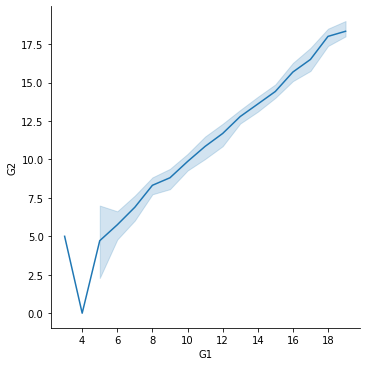

In [37]:
sns.relplot(x='G1',
           y='G2',
           data=df_mat, kind='line')

## Fedu/Medu com número de reprovações

Agora vamos analisar a relação da educação dos pais com número de reprovações que os alunos já tiveram (failures).


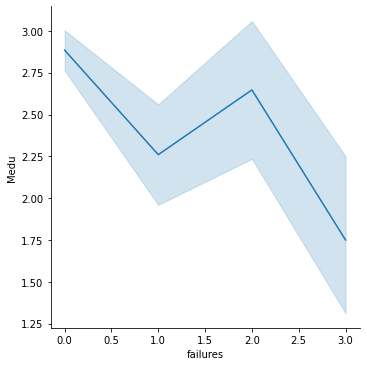

In [38]:
df_mat["Pedu"] = (df_mat["Medu"] + df_mat["Fedu"])

sns.relplot(y='Medu', x='failures', data=df_mat, kind='line')